In [36]:
#initial import of relevant packages for graphing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#https://stackoverflow.com/questions/32085531/importing-a-csv-file-into-python-to-make-scatterplots-and-histograms

In [37]:
#initial read and print of motifs_dataframe
motifs_df = pd.read_csv("../rosetta_motifs/motifs_rmsds.csv")
motifs_df

,system,rmsd,placement_pdb
0,aa2ar,4.147040,aa2ar_ResPos_159_ResID_PHE_Trio25_+_motif_1OU4...
1,abl1,0.124568,abl1_ResPos_83_ResID_THR_Trio42_+_motif_6DWM_H...
2,ace,0.407009,ace_ResPos_293_ResID_SER_Trio17_+_motif_7Q26_8...
3,aces,0.133846,aces_ResPos_52_ResID_TRP_Trio65_+_motif_7AIX_8...
4,ada,0.272664,ada_ResPos_151_ResID_MET_Trio38_+_motif_3UZC_T...
...,...,...,...
80,thb,0.165592,thb_ResPos_115_ResID_LEU_Trio20_+_motif_4A6E_A...
81,thrb,0.214373,thrb_ResPos_111_ResID_LEU_Trio18_+_motif_5AFJ_...
82,tryb1,0.429380,tryb1_ResPos_209_ResID_GLU_Trio49_+_motif_5F6D...
83,urok,0.160134,urok_ResPos_208_ResID_CYS_Trio60_+_motif_2A1D_...


In [38]:
#initial read and print of AutoDock Vina dataframe
ad_df = pd.read_csv("../AutoDock_Vina/ADV_best_rmsds.csv",header=None)
ad_df

,0,1
0,aa2ar,2.403411
1,abl1,0.220222
2,ace,1.308332
3,aces,0.458188
4,ada,4.494674
...,...,...
97,tysy,1.448866
98,urok,0.757082
99,vgfr2,0.734574
100,wee1,0.645238


In [39]:
#rename autodock columns to be "system" and "rmsd" like with motifs dataframe (initial .csv did not have header line)
ad_df.columns = ['system', 'rmsd']
#test print
ad_df

,system,rmsd
0,aa2ar,2.403411
1,abl1,0.220222
2,ace,1.308332
3,aces,0.458188
4,ada,4.494674
...,...,...
97,tysy,1.448866
98,urok,0.757082
99,vgfr2,0.734574
100,wee1,0.645238


In [40]:
#Inner join of motifs and autodock dataframes for plotting purposes; followed with test print
merged_df = pd.merge(motifs_df, ad_df, on='system', how='inner')
merged_df

,system,rmsd_x,placement_pdb,rmsd_y
0,aa2ar,4.147040,aa2ar_ResPos_159_ResID_PHE_Trio25_+_motif_1OU4...,2.403411
1,abl1,0.124568,abl1_ResPos_83_ResID_THR_Trio42_+_motif_6DWM_H...,0.220222
2,ace,0.407009,ace_ResPos_293_ResID_SER_Trio17_+_motif_7Q26_8...,1.308332
3,aces,0.133846,aces_ResPos_52_ResID_TRP_Trio65_+_motif_7AIX_8...,0.458188
4,ada,0.272664,ada_ResPos_151_ResID_MET_Trio38_+_motif_3UZC_T...,4.494674
...,...,...,...,...
80,thb,0.165592,thb_ResPos_115_ResID_LEU_Trio20_+_motif_4A6E_A...,0.737146
81,thrb,0.214373,thrb_ResPos_111_ResID_LEU_Trio18_+_motif_5AFJ_...,0.281836
82,tryb1,0.429380,tryb1_ResPos_209_ResID_GLU_Trio49_+_motif_5F6D...,0.513567
83,urok,0.160134,urok_ResPos_208_ResID_CYS_Trio60_+_motif_2A1D_...,0.757082


In [41]:
#drop placement_pdb column from motifs dataframe
merged_df = merged_df.drop(columns=['placement_pdb'])
#rename columns for rmsd from motifs and autodock
merged_df.columns = ['system', 'rmsd_motifs', 'rmsd_adv']
#test_print
merged_df

,system,rmsd_motifs,rmsd_adv
0,aa2ar,4.147040,2.403411
1,abl1,0.124568,0.220222
2,ace,0.407009,1.308332
3,aces,0.133846,0.458188
4,ada,0.272664,4.494674
...,...,...,...
80,thb,0.165592,0.737146
81,thrb,0.214373,0.281836
82,tryb1,0.429380,0.513567
83,urok,0.160134,0.757082


In [42]:
#initial read and print of Schrodinger Glide dataframe
sg_df = pd.read_csv("../schrodinger_glide/glide_best_rmsd.csv")
sg_df

,system_name,best_rmsd,best_rmsd_pose,total_poses
0,aa2ar,7.927534,13.0,15.0
1,abl1,0.424373,1.0,1.0
2,ace,3.781334,1.0,8.0
3,aces,0.638513,4.0,5.0
4,ada,1.452599,1.0,4.0
...,...,...,...,...
97,tysy,1.925273,4.0,4.0
98,urok,0.849532,1.0,5.0
99,vgfr2,1.357784,2.0,3.0
100,wee1,0.710819,6.0,6.0


In [43]:
#rename schrodinger columns to be 'system', 'rmsd', 'best_pose', 'num_poses' like with motifs dataframe (initial .csv did not have header line)
sg_df.columns = ['system', 'rmsd', 'best_pose', 'num_poses']
#test print
sg_df

,system,rmsd,best_pose,num_poses
0,aa2ar,7.927534,13.0,15.0
1,abl1,0.424373,1.0,1.0
2,ace,3.781334,1.0,8.0
3,aces,0.638513,4.0,5.0
4,ada,1.452599,1.0,4.0
...,...,...,...,...
97,tysy,1.925273,4.0,4.0
98,urok,0.849532,1.0,5.0
99,vgfr2,1.357784,2.0,3.0
100,wee1,0.710819,6.0,6.0


In [44]:
sg_df = sg_df[sg_df['rmsd'].isna() == False]
sg_df

,system,rmsd,best_pose,num_poses
0,aa2ar,7.927534,13.0,15.0
1,abl1,0.424373,1.0,1.0
2,ace,3.781334,1.0,8.0
3,aces,0.638513,4.0,5.0
4,ada,1.452599,1.0,4.0
...,...,...,...,...
97,tysy,1.925273,4.0,4.0
98,urok,0.849532,1.0,5.0
99,vgfr2,1.357784,2.0,3.0
100,wee1,0.710819,6.0,6.0


In [45]:
#Inner join of motifs and shrodinger dataframes for plotting purposes; followed with test print
merged_df = pd.merge(merged_df, sg_df, on='system', how='inner')
merged_df

,system,rmsd_motifs,rmsd_adv,rmsd,best_pose,num_poses
0,aa2ar,4.147040,2.403411,7.927534,13.0,15.0
1,abl1,0.124568,0.220222,0.424373,1.0,1.0
2,ace,0.407009,1.308332,3.781334,1.0,8.0
3,aces,0.133846,0.458188,0.638513,4.0,5.0
4,ada,0.272664,4.494674,1.452599,1.0,4.0
...,...,...,...,...,...,...
79,thb,0.165592,0.737146,2.085737,1.0,2.0
80,thrb,0.214373,0.281836,0.320517,1.0,1.0
81,tryb1,0.429380,0.513567,0.933948,1.0,3.0
82,urok,0.160134,0.757082,0.849532,1.0,5.0


In [46]:
#drop non-needed columns from merged dataframe
#merged_df = merged_df.drop(columns=['placement_pdb'])
merged_df = merged_df.drop(columns=['best_pose'])
merged_df = merged_df.drop(columns=['num_poses'])
#rename columns for rmsd from motifs and autodock
merged_df.columns = ['system', 'rmsd_motifs', 'rmsd_adv', 'rmsd_sg']
#test_print
merged_df

,system,rmsd_motifs,rmsd_adv,rmsd_sg
0,aa2ar,4.147040,2.403411,7.927534
1,abl1,0.124568,0.220222,0.424373
2,ace,0.407009,1.308332,3.781334
3,aces,0.133846,0.458188,0.638513
4,ada,0.272664,4.494674,1.452599
...,...,...,...,...
79,thb,0.165592,0.737146,2.085737
80,thrb,0.214373,0.281836,0.320517
81,tryb1,0.429380,0.513567,0.933948
82,urok,0.160134,0.757082,0.849532


In [47]:
#read in the Dock 3.7 data
dock_df = pd.read_csv("../dock6/output_files/dock6_best_rmsds.csv")
dock_df

,system,rmsd
0,aa2ar,0.504364
1,abl1,0.067903
2,ace,0.853320
3,aces,0.020333
4,ada,0.314907
...,...,...
199,aldr,0.527157
200,inha,1.124074
201,pur2,0.610745
202,pgh2,0.233567


In [48]:
#remove any nan
dock_df = dock_df[dock_df['rmsd'].isna() == False]
dock_df

,system,rmsd
0,aa2ar,0.504364
1,abl1,0.067903
2,ace,0.853320
3,aces,0.020333
4,ada,0.314907
...,...,...
199,aldr,0.527157
200,inha,1.124074
201,pur2,0.610745
202,pgh2,0.233567


In [49]:
#Inner join of motifs and dock dataframes for plotting purposes; followed with test print
merged_df = pd.merge(merged_df, dock_df, on='system', how='inner')
merged_df

,system,rmsd_motifs,rmsd_adv,rmsd_sg,rmsd
0,aa2ar,4.147040,2.403411,7.927534,0.504364
1,aa2ar,4.147040,2.403411,7.927534,0.602898
2,abl1,0.124568,0.220222,0.424373,0.067903
3,abl1,0.124568,0.220222,0.424373,0.202259
4,ace,0.407009,1.308332,3.781334,0.853320
...,...,...,...,...,...
163,tryb1,0.429380,0.513567,0.933948,0.228896
164,urok,0.160134,0.757082,0.849532,0.091294
165,urok,0.160134,0.757082,0.849532,0.271452
166,xiap,4.635133,2.192569,2.461600,0.393424


In [50]:
#rename column for rmsd from dock
merged_df.columns = ['system', 'rmsd_motifs', 'rmsd_adv', 'rmsd_sg', 'rmsd_dock']
merged_df

,system,rmsd_motifs,rmsd_adv,rmsd_sg,rmsd_dock
0,aa2ar,4.147040,2.403411,7.927534,0.504364
1,aa2ar,4.147040,2.403411,7.927534,0.602898
2,abl1,0.124568,0.220222,0.424373,0.067903
3,abl1,0.124568,0.220222,0.424373,0.202259
4,ace,0.407009,1.308332,3.781334,0.853320
...,...,...,...,...,...
163,tryb1,0.429380,0.513567,0.933948,0.228896
164,urok,0.160134,0.757082,0.849532,0.091294
165,urok,0.160134,0.757082,0.849532,0.271452
166,xiap,4.635133,2.192569,2.461600,0.393424


In [51]:
#bin the placements
# Define the bins
bins = [0, 2, 5, 100000]
labels = ['0-2 Å', '2-5 Å', '>5 Å']

In [52]:
# Function to categorize and count occurrences
def categorize_and_count(column):
    
    if column == 'system': return
    
    return pd.cut(merged_df[column], bins=bins, labels=labels, right=False).value_counts().sort_index()

In [53]:
# Apply the function to each column
categorized_counts = pd.DataFrame({col: categorize_and_count(col) for col in merged_df.columns})
print("\nCategorized Counts DataFrame:")
print(categorized_counts)


Categorized Counts DataFrame:
      system  rmsd_motifs  rmsd_adv  rmsd_sg  rmsd_dock
0-2 Å   None          152       130      110        132
2-5 Å   None           10        24       26          7
>5 Å    None            6        14       32         29


In [54]:
#rename columns
categorized_counts.columns = ['system','Rosetta Motifs', 'AutoDock Vina', 'Schrodinger Glide', 'Dock 3.7']

In [55]:
#drop the system column from catagorized_counts:
categorized_counts = categorized_counts.drop(columns=['system'])

t_categorized_counts = categorized_counts.T
t_categorized_counts

,0-2 Å,2-5 Å,>5 Å
Rosetta Motifs,152,10,6
AutoDock Vina,130,24,14
Schrodinger Glide,110,26,32
Dock 3.7,132,7,29


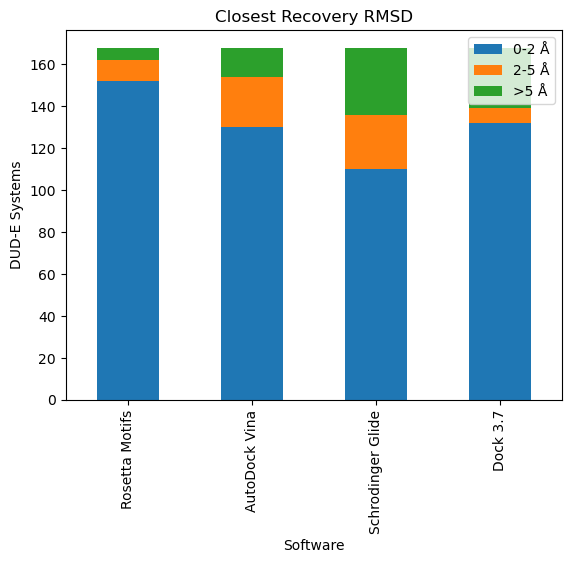

In [56]:
# Plot the data
ax = t_categorized_counts.plot(kind='bar', stacked=True)

# Add labels and title
ax.set_xlabel('Software')
ax.set_ylabel('DUD-E Systems')
ax.set_title('Closest Recovery RMSD')

plt.show()